In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.dates import MonthLocator
import numpy as np

In [12]:
df_dim_date = pd.read_csv("dataset/dim_date.csv")
df_dim_districts = pd.read_csv("dataset/dim_districts.csv")
df_fact_stamps = pd.read_csv("dataset/fact_stamps.csv")
df_fact_transport = pd.read_csv("dataset/fact_transport.csv")
df_fact_TS_iPASS = pd.read_csv("dataset/fact_TS_iPASS.csv")


In [3]:
df_dim_date.head()

,month,Mmm,quarter,fiscal_year
0,2019-04-01,Apr,Q1,2019
1,2019-05-01,May,Q1,2019
2,2019-06-01,Jun,Q1,2019
3,2019-07-01,Jul,Q2,2019
4,2019-08-01,Aug,Q2,2019


In [4]:
df_dim_districts.head()

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial


In [5]:
df_fact_stamps.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


In [6]:
df_fact_transport.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160


In [7]:
df_fact_TS_iPASS.head()

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,01-04-2019,Engineering,2.3200,15
1,19_1,01-04-2019,Engineering,0.6250,13
2,20_3,01-04-2019,Wood and Leather,0.2000,8
3,20_3,01-04-2019,Textiles,0.2675,27
4,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5


In [27]:
merged_df = pd.merge(df_fact_stamps, df_dim_districts, on='dist_code', how='left')
merged_df.head()


,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,district
0,14_1,2019-04-01,4533,59236363,0,0,Mahabubnagar
1,17_3,2019-04-01,4151,41508762,0,0,Siddipet
2,20_3,2019-04-01,2116,23674170,0,0,Rajanna Sircilla
3,21_5,2019-04-01,1089,15915285,0,0,Mahabubabad
4,23_1,2019-04-01,6133,82593256,0,0,Nalgonda


In [44]:
#checking for null values
merged_df.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
district                    0
Month                       0
revenue_segment             0
dtype: int64

## Question 1 (will use Power BI graph)

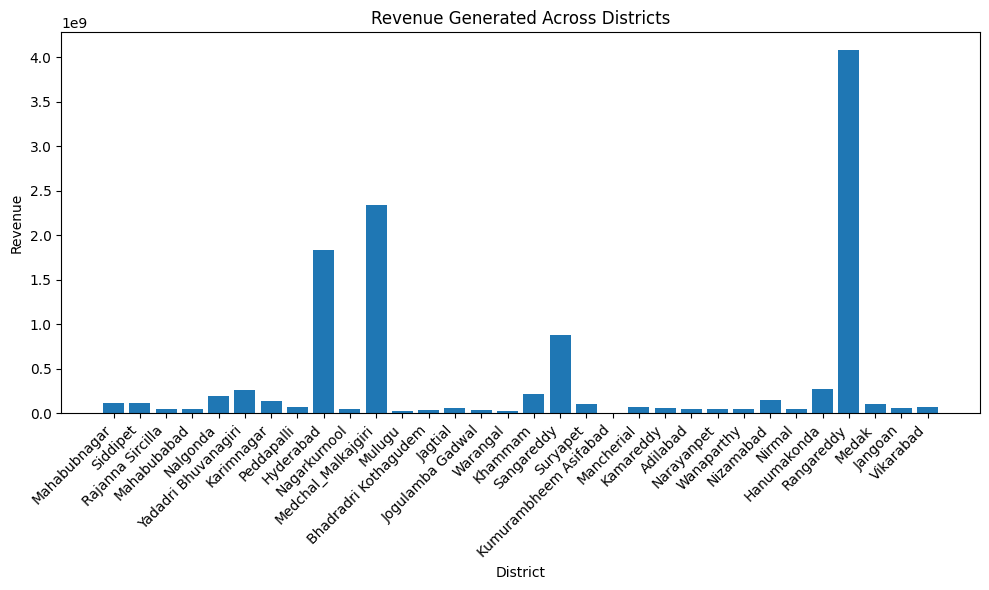

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['district'], merged_df['documents_registered_rev'])
plt.xlabel('District')
plt.ylabel('Revenue')
plt.title('Revenue Generated Across Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Question 2

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14808\2312013783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_revenue = merged_df.groupby('district').sum()


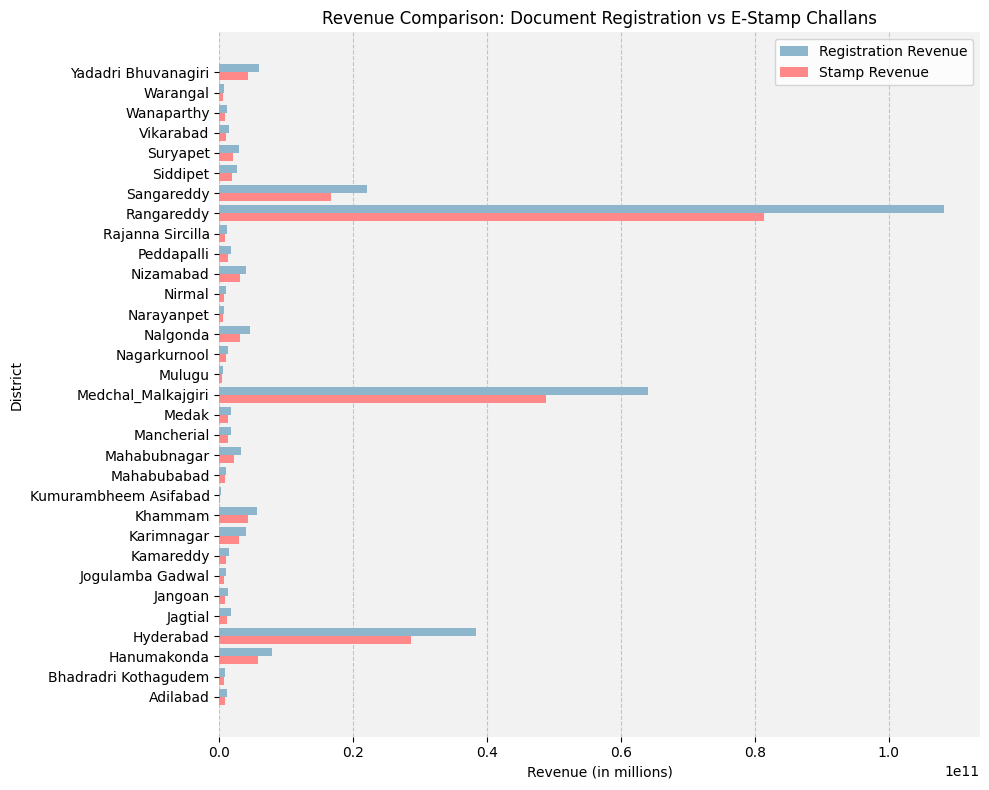

In [49]:
district_revenue = merged_df.groupby('district').sum()

bar_positions = np.arange(len(district_revenue))
bar_height = 0.4

# Define pastel colors
pastel_blue = '#8DB6CD'
pastel_red = '#FF8888'

fig, ax = plt.subplots(figsize=(10, 8))
registration_bars = ax.barh(bar_positions, district_revenue['documents_registered_rev'], bar_height, label='Registration Revenue', color=pastel_blue)
stamp_bars = ax.barh(bar_positions - bar_height, district_revenue['estamps_challans_rev'], bar_height, label='Stamp Revenue', color=pastel_red)

ax.set_title('Revenue Comparison: Document Registration vs E-Stamp Challans')
ax.set_xlabel('Revenue (in millions)')
ax.set_ylabel('District')
ax.set_yticks(bar_positions - bar_height/2)
ax.set_yticklabels(district_revenue.index, fontsize=10)
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# Adding a background color to the plot
ax.set_facecolor('#f2f2f2')

# Adding a border around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()



In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 0 to 1503
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   dist_code                 1504 non-null   object        
 1   month                     1504 non-null   object        
 2   documents_registered_cnt  1504 non-null   int64         
 3   documents_registered_rev  1504 non-null   int64         
 4   estamps_challans_cnt      1504 non-null   int64         
 5   estamps_challans_rev      1504 non-null   int64         
 6   district                  1504 non-null   object        
 7   Month                     1504 non-null   datetime64[ns]
 8   revenue_segment           1504 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 117.5+ KB


## Question 3

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14808\335612311.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_revenue = merged_df.groupby('Month').sum().reset_index()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14808\335612311.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


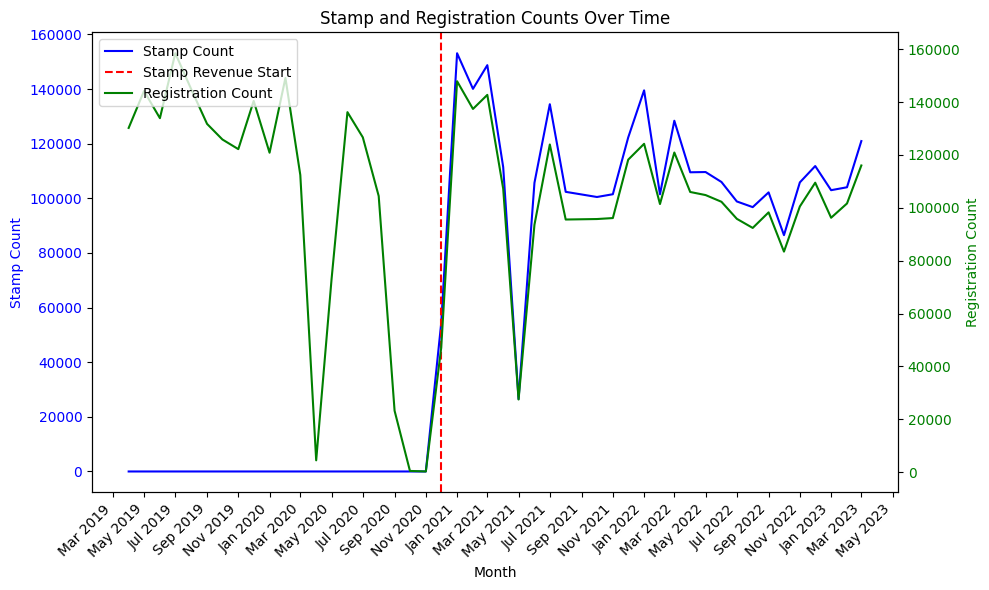

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed
merged_df['Month'] = pd.to_datetime(merged_df['month'], format='%Y-%m')
month_revenue = merged_df.groupby('Month').sum().reset_index()

# Plot stamp count over time
ax1.plot(month_revenue['Month'], month_revenue['estamps_challans_cnt'], color='blue', label='Stamp Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Stamp Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for registration count
ax2 = ax1.twinx()
ax2.plot(month_revenue['Month'], month_revenue['documents_registered_cnt'], color='green', label='Registration Count')
ax2.set_ylabel('Registration Count', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Mark the implementation of stamp revenue with a vertical line
stamp_revenue_start = pd.to_datetime('2020-12-01')
ax1.axvline(stamp_revenue_start, color='red', linestyle='--', label='Stamp Revenue Start')

# Set xticks for each month
locator = MonthLocator(bymonthday=1, interval=2)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.title('Stamp and Registration Counts Over Time')
plt.tight_layout()
plt.show()

## Question 4

In [13]:
revenue_by_district = merged_df.groupby('district')['estamps_challans_rev'].sum()

# Define quantiles to categorize districts into segments
quantiles = revenue_by_district.quantile([0, 0.33, 0.66, 1])

# Function to assign segment labels
def assign_segment(revenue):
    if revenue <= quantiles[0.33]:
        return 'Low Revenue'
    elif revenue <= quantiles[0.66]:
        return 'Medium Revenue'
    else:
        return 'High Revenue'

# Assign segment labels to each district
merged_df['revenue_segment'] = merged_df['district'].map(revenue_by_district.apply(assign_segment))

# Print the DataFrame with assigned segments
merged_df.head()


,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,district,Month,revenue_segment
0,14_1,2019-04-01,4533,59236363,0,0,Mahabubnagar,2019-04-01,High Revenue
1,17_3,2019-04-01,4151,41508762,0,0,Siddipet,2019-04-01,Medium Revenue
2,20_3,2019-04-01,2116,23674170,0,0,Rajanna Sircilla,2019-04-01,Low Revenue
3,21_5,2019-04-01,1089,15915285,0,0,Mahabubabad,2019-04-01,Low Revenue
4,23_1,2019-04-01,6133,82593256,0,0,Nalgonda,2019-04-01,High Revenue


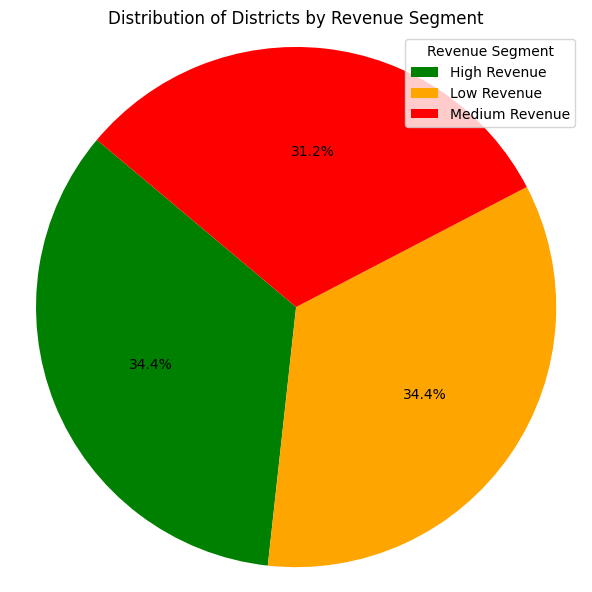

In [60]:

segment_counts = merged_df['revenue_segment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
colors = ['green', 'orange', 'red']
plt.pie(segment_counts, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Districts by Revenue Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Revenue Segment", labels=segment_counts.index, loc="upper right")
 
plt.tight_layout(pad=1.0)
plt.show()


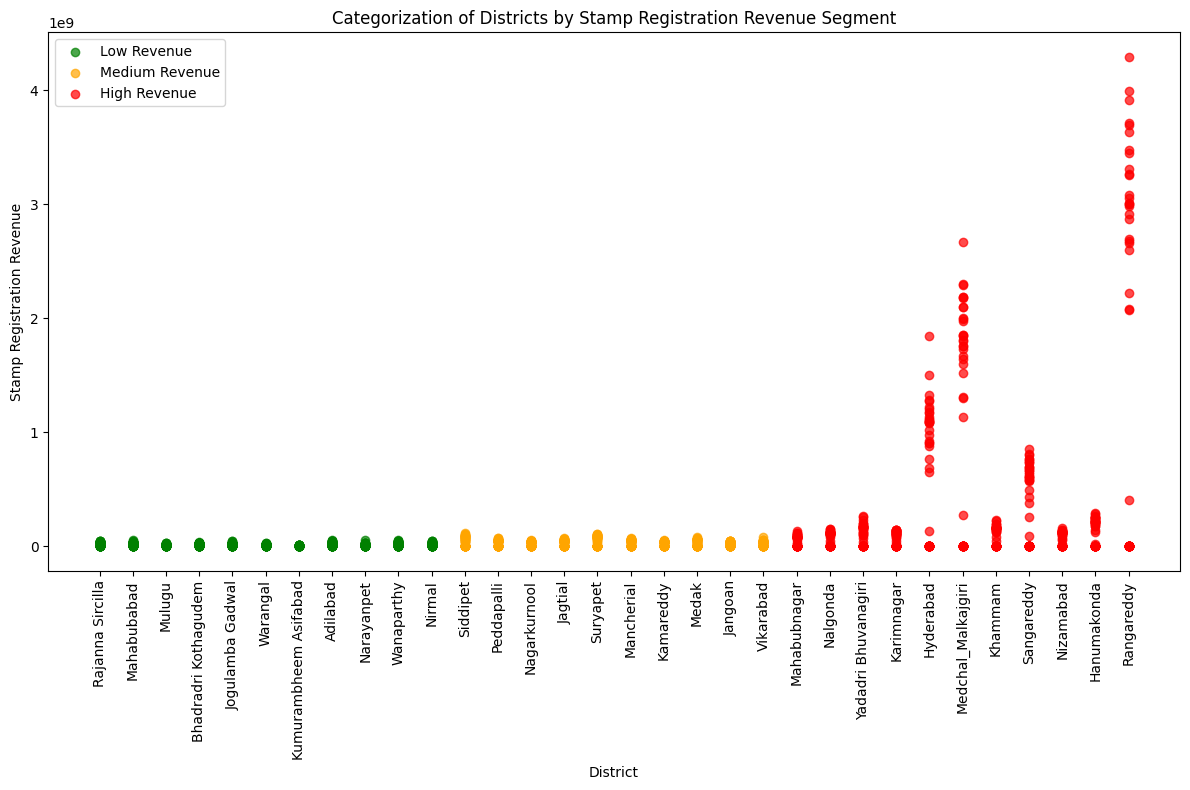

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'merged_df' with columns 'district', 'revenue_segment', and 'estamps_challans_rev'

# Set up a color palette for the segments
segment_colors = {'Low Revenue': 'green', 'Medium Revenue': 'orange', 'High Revenue': 'red'}

# Create a scatter plot with color-coded segments
plt.figure(figsize=(12, 8))

# Iterate through each segment and plot points with the corresponding color
for segment, color in segment_colors.items():
    segment_df = merged_df[merged_df['revenue_segment'] == segment]
    plt.scatter(segment_df['district'], segment_df['estamps_challans_rev'], color=color, label=segment, alpha=0.7)

plt.title('Categorization of Districts by Stamp Registration Revenue Segment')
plt.xlabel('District')
plt.ylabel('Stamp Registration Revenue')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


In [16]:
import geopandas as gpd
import folium

# Load GeoJSON data using GeoPandas
json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)

# Set the CRS for the GeoDataFrame (replace 'EPSG:4326' with the correct CRS code)
gdf.crs = 'EPSG:4326'  # For example, using WGS84

# Reproject the GeoDataFrame if needed (replace 'EPSG:3857' with your desired CRS)
# gdf = gdf.to_crs('EPSG:3857')

# Create a Folium map centered around the data
center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add GeoJSON data to the map
folium.GeoJson(gdf).add_to(m)

# Save the map as an HTML file
output_map_path = 'output_map.html'
m.save(output_map_path)

# Display the map (if using a Jupyter Notebook)
display(m)



C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14808\1797910697.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf.geometry.centroid.y.mean()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14808\1797910697.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf.geometry.centroid.x.mean()


In [43]:
import folium
import geopandas as gpd

json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)

gdf.crs = 'EPSG:4326'

district_segment_mapping = dict(zip(merged_df['district'], merged_df['revenue_segment']))

def style_function(feature):
    segment = district_segment_mapping.get(feature['properties']['New_Distri'])
    return {
        'fillOpacity': 0.6,
        'fillColor': 'green' if segment == 'Low Revenue' else 'orange' if segment == 'Medium Revenue' else 'red',
        'color': 'black',
        'weight': 1.5,
        'dashArray': '5, 5',
    }

center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles=None)

tooltip = folium.GeoJsonTooltip(fields=['New_Distri'])

folium.GeoJson(gdf, style_function=style_function, tooltip=tooltip).add_to(m)

for index, row in gdf.iterrows():
    district_name = row['New_Distri']
    district_center = [row.geometry.centroid.y, row.geometry.centroid.x]
    
    # Create a custom icon to display district name as text
    icon = folium.DivIcon(html=f'<div style="font-size: 15px;">{district_name}</div>')
    folium.Marker(location=district_center, icon=icon).add_to(m)

legend_html = '''
    <style>
        .map-legend {
            position: absolute;
            bottom: 20px;
            left: 50px;
            width: 220px;
            padding: 6px;
            background-color: rgba(255, 255, 255, 0.8);
            border-radius: 4px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
        }
    </style>
    <div class="map-legend">
        <p>Legend:</p>
        <p><span class="low-revenue">Low Revenue</span></p>
        <p><span class="medium-revenue">Medium Revenue</span></p>
        <p><span class="high-revenue">High Revenue</span></p>
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

colormap_html = '''
    <div style="position: absolute; bottom: 40px; left: 50px; width: 220px; padding: 6px; background-color: rgba(255, 255, 255, 0.8); border-radius: 4px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);">
        <p>Map Labels:</p>
        <p><span style="color: black;">District Labels</span></p>
    </div>
'''
m.get_root().html.add_child(folium.Element(colormap_html))

output_map_path = 'temp_map.html'
m.save(output_map_path)

display(m)


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14808\2392715505.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf.geometry.centroid.y.mean()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14808\2392715505.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf.geometry.centroid.x.mean()


## Question 6

In [53]:
merged_transport_df = pd.merge(df_fact_transport, df_dim_districts, on='dist_code', how='left')
merged_transport_df.head()


,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,district
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163,Rangareddy
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175,Kamareddy
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144,Rajanna Sircilla
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169,Jangoan
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160,Jayashankar Bhupalpally


In [54]:
merged_transport_df['TotalVehicles'] = merged_transport_df[['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']].sum(axis=1)
vehicle_classes = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']
for vehicle_class in vehicle_classes:
    merged_transport_df[vehicle_class] = merged_transport_df[vehicle_class] / merged_transport_df['TotalVehicles']


In [15]:
merged_transport_df.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,district,TotalVehicles
0,15_1,2019-04-01,17910,3011,76,22,0.728293,0.210714,0.000000,0.000190,0.060802,16110,4182,717,19542,1477,19856,1163,Rangareddy,21019
1,18_2,2019-04-01,3066,306,6,0,0.886619,0.042037,0.014506,0.018946,0.037892,3156,189,33,3322,56,3203,175,Kamareddy,3378
2,20_3,2019-04-01,1577,215,0,0,0.862723,0.044085,0.016183,0.011719,0.065290,1683,104,5,1751,41,1648,144,Rajanna Sircilla,1792
3,21_3,2019-04-01,1961,281,2,0,0.864082,0.032086,0.032086,0.021390,0.050357,2082,146,16,2209,35,2075,169,Jangoan,2244
4,21_7,2019-04-01,1552,309,0,0,0.812466,0.040838,0.037077,0.058571,0.051048,1696,145,20,1820,41,1701,160,Jayashankar Bhupalpally,1861


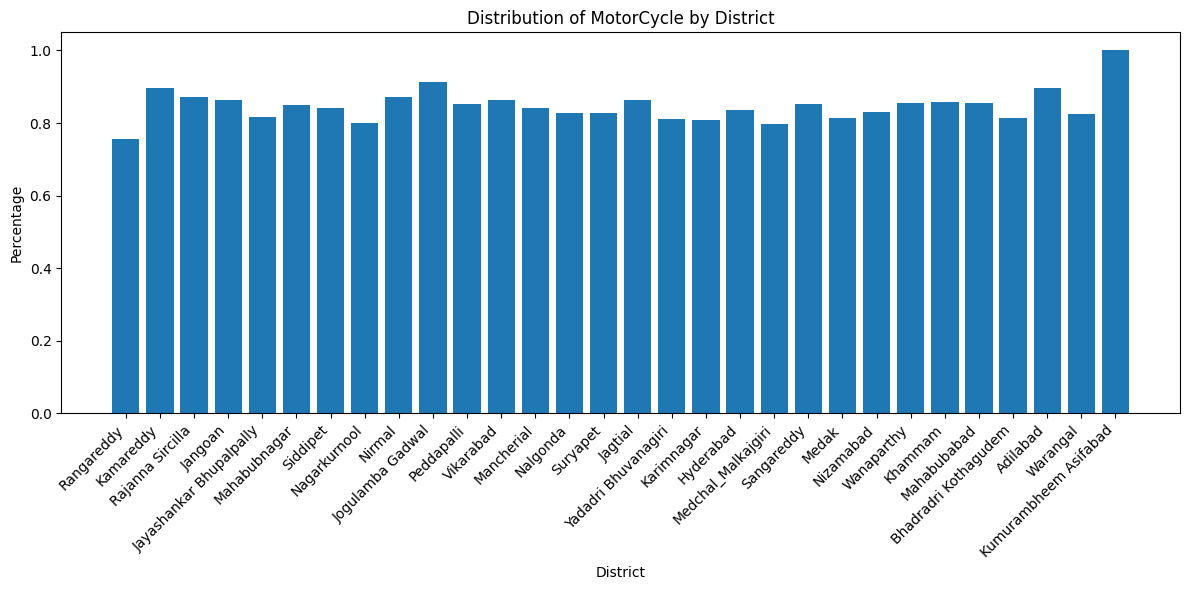

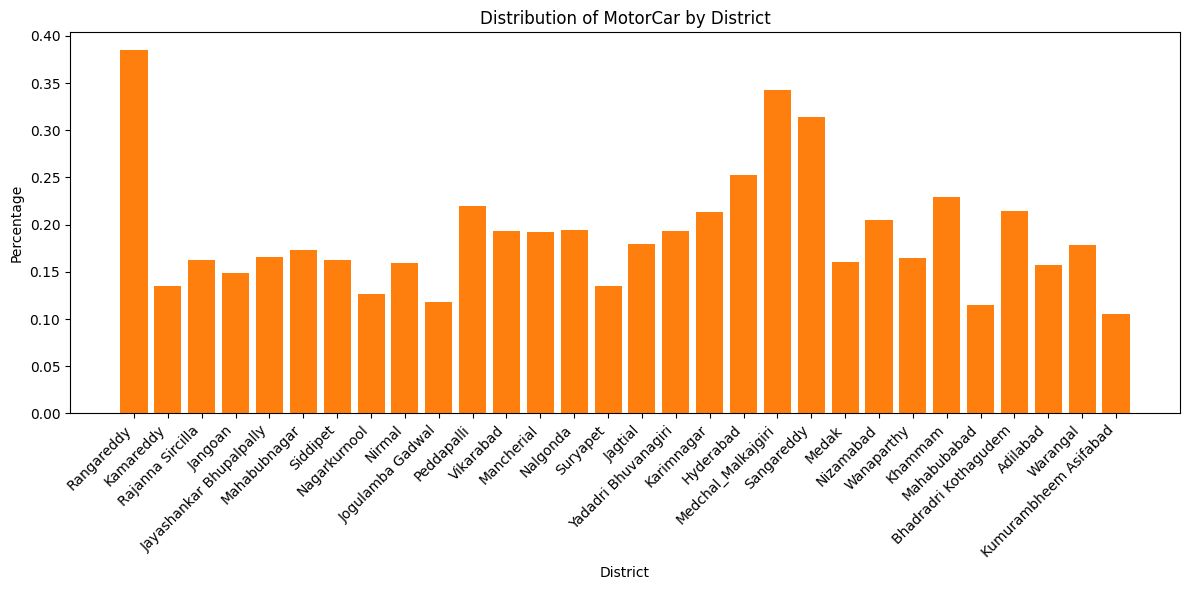

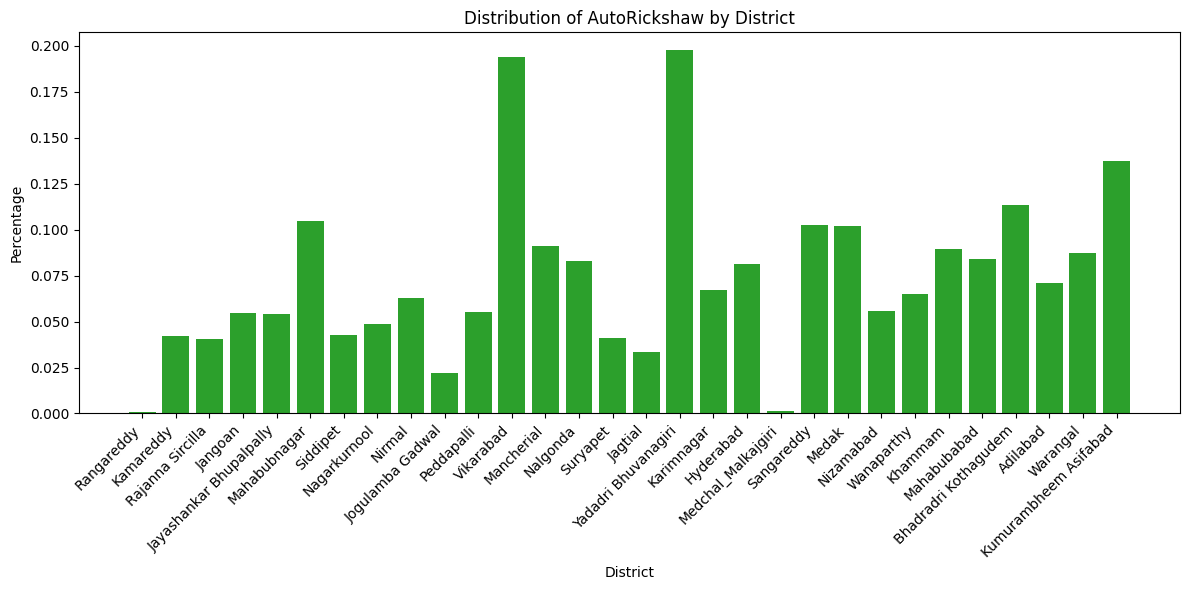

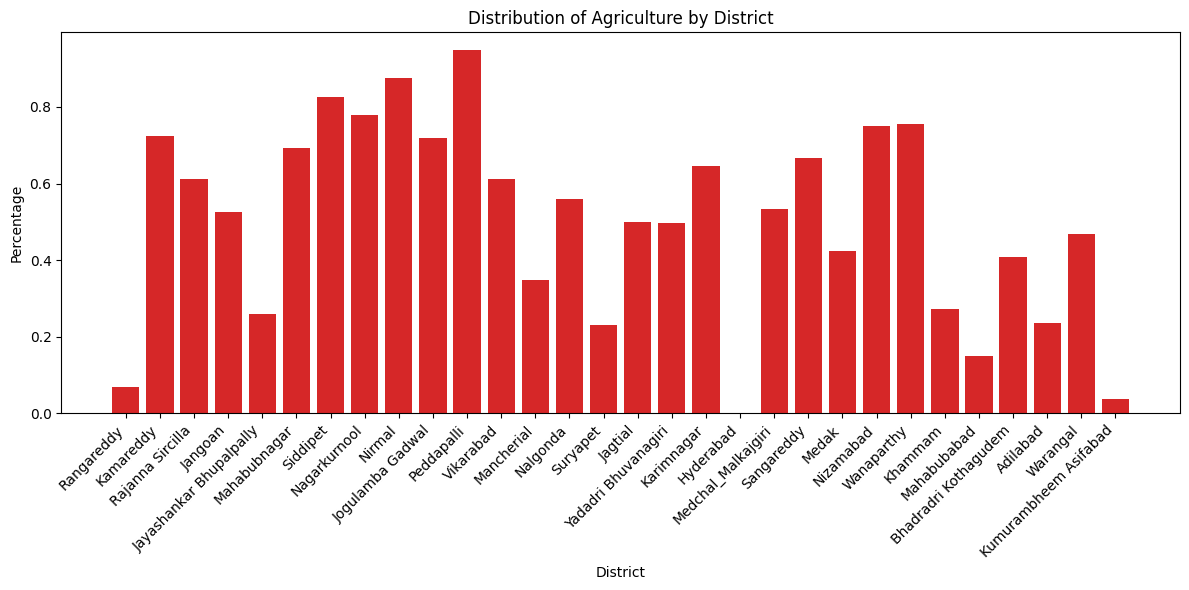

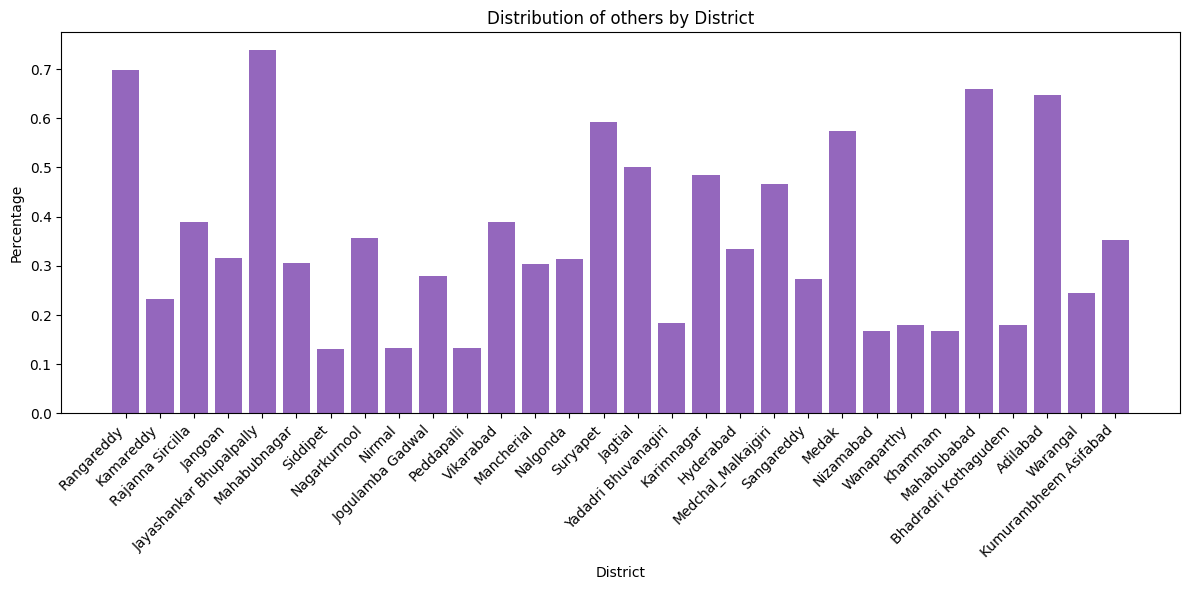

In [48]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot individual plots for each vehicle class with different colors
for vehicle_class, color in zip(vehicle_classes, colors):
    plt.figure(figsize=(12, 6))
    plt.bar(merged_transport_df['district'], merged_transport_df[vehicle_class], color=color)
    plt.xlabel('District')
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {vehicle_class[13:]} by District')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_11052\936906215.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(merged_transport_df['district'], rotation=45, ha='right')


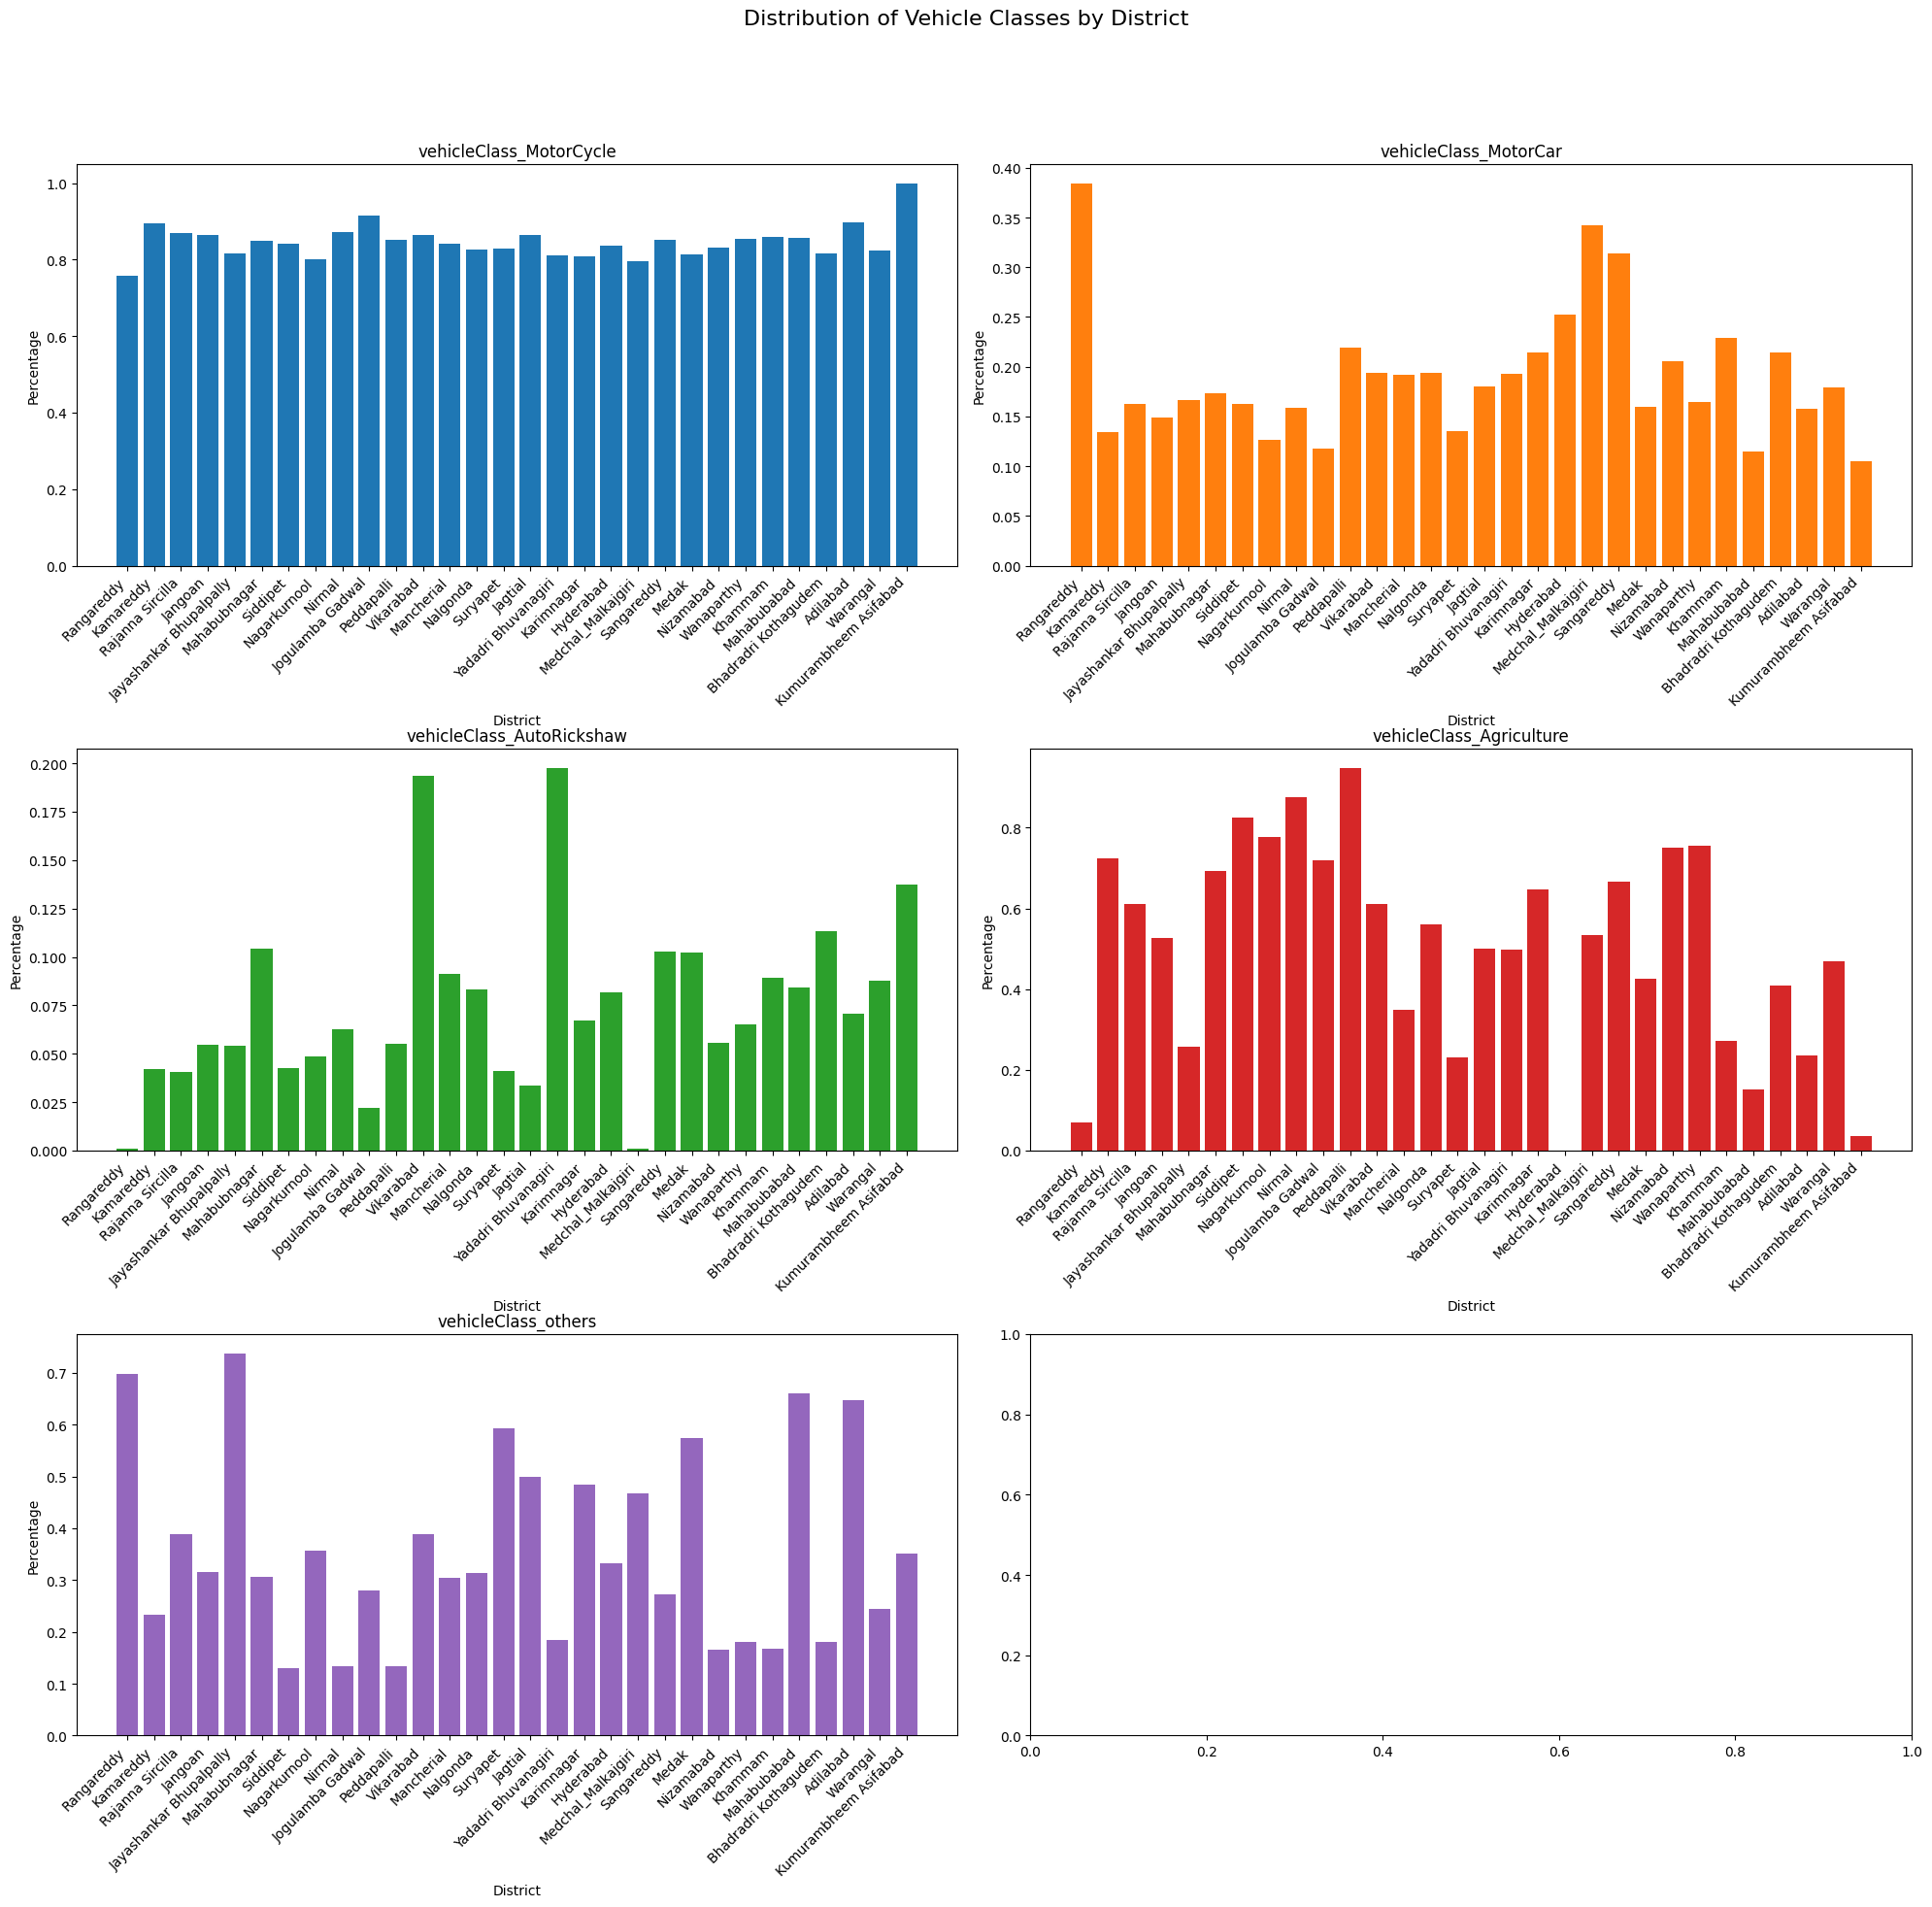

In [52]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.suptitle('Distribution of Vehicle Classes by District', fontsize=16)
for idx, (vehicle_class, color) in enumerate(zip(vehicle_classes, colors)):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    ax.bar(merged_transport_df['district'], merged_transport_df[vehicle_class], color=color)
    ax.set_title(vehicle_class)
    ax.set_xlabel('District')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(merged_transport_df['district'], rotation=45, ha='right')

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the figure with all plots
plt.show()